# 📊 Exploratory Data Analysis – Students Performance

This notebook contains a complete exploratory data analysis (EDA) of the **Students Performance** dataset. The objective is to investigate how demographic and educational factors influence students' scores in three key subjects: **Math**, **Reading**, and **Writing**.

In addition to visualizing and analyzing relationships, we include optional steps such as normalization to prepare the dataset for potential downstream tasks like modeling.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


## 📥 Load Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 📋 Basic Information and Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 📈 Distribution of Student Scores

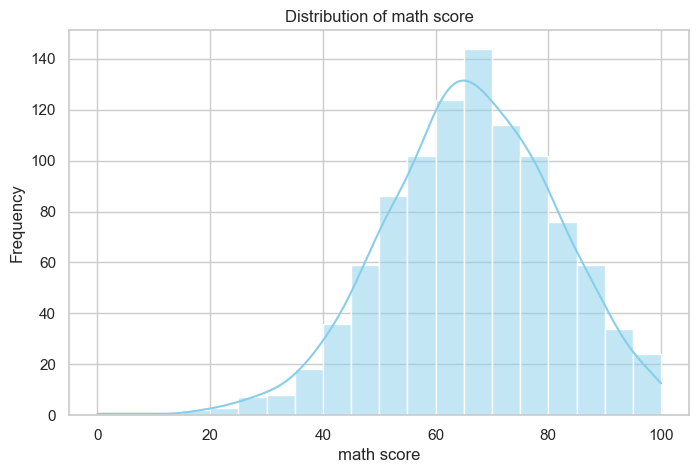

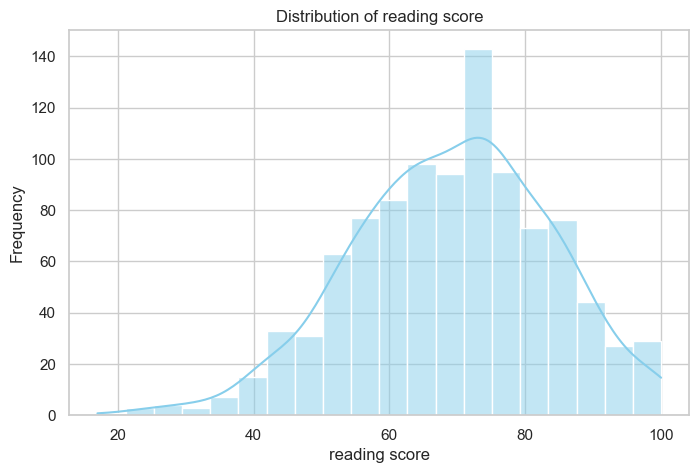

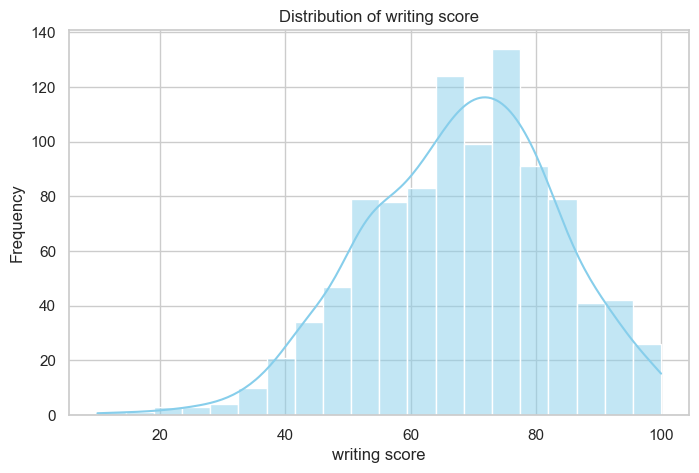

In [6]:
for col in ['math score', 'reading score', 'writing score']:
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 📦 Boxplots by Gender

/var/folders/jt/sgp4392j1ysgvdd5dk6c99k00000gp/T/ipykernel_11797/1321126870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='Set2')


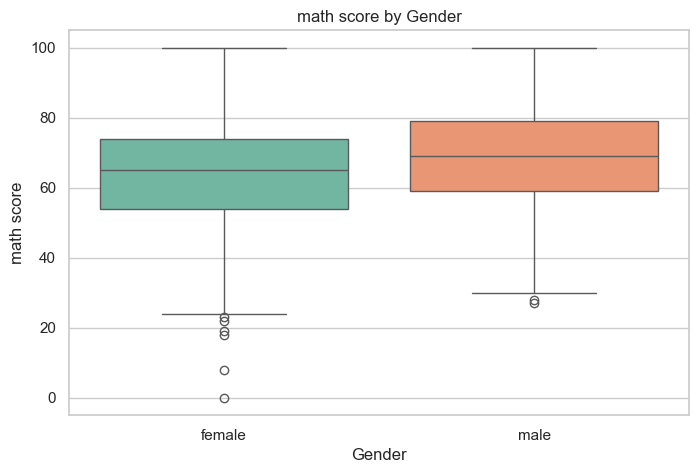

/var/folders/jt/sgp4392j1ysgvdd5dk6c99k00000gp/T/ipykernel_11797/1321126870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='Set2')


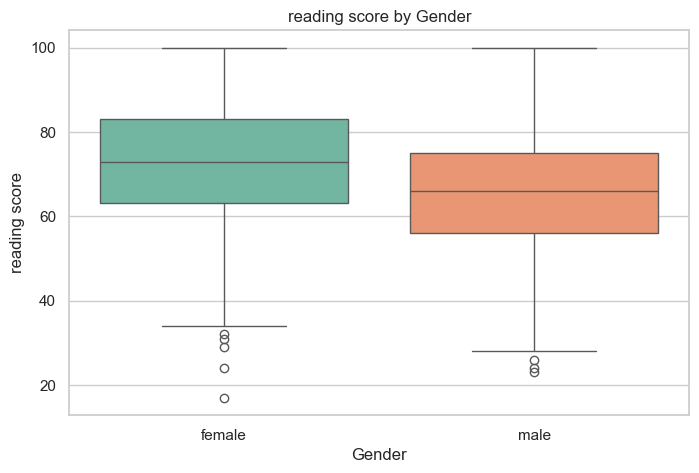

/var/folders/jt/sgp4392j1ysgvdd5dk6c99k00000gp/T/ipykernel_11797/1321126870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='Set2')


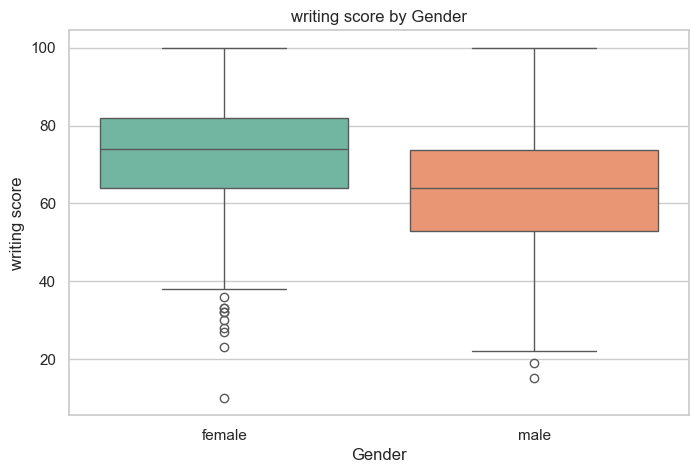

In [7]:
# These plots help compare performance distributions between male and female students.
for col in ['math score', 'reading score', 'writing score']:
    sns.boxplot(x='gender', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)
    plt.show()

## 🔍 Scatter Plots Between Scores

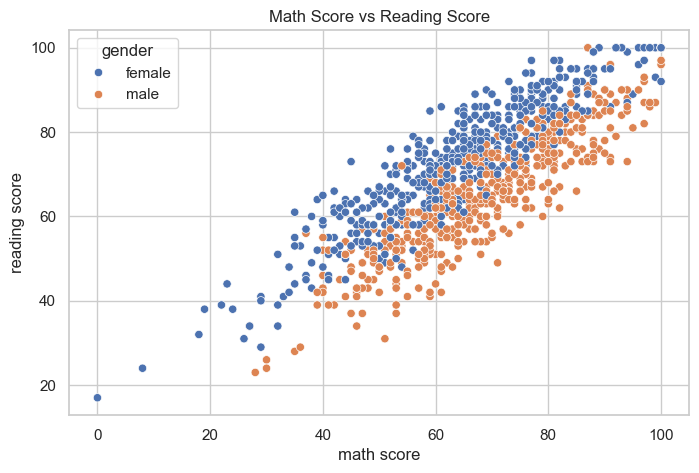

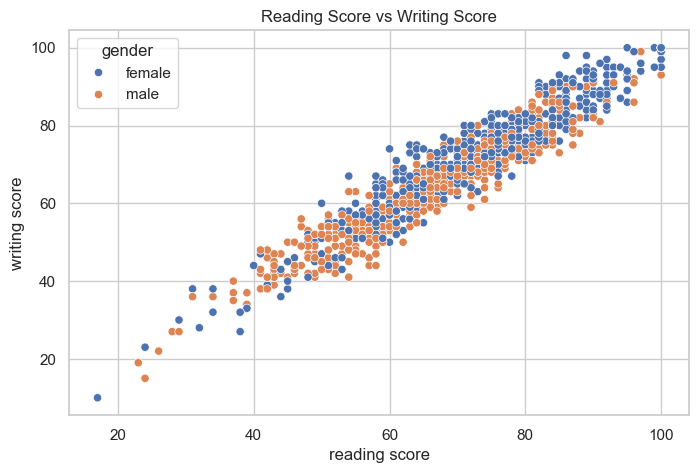

In [8]:
# These plots show how scores relate to each other and highlight trends across gender.
sns.scatterplot(x='math score', y='reading score', hue='gender', data=df)
plt.title('Math Score vs Reading Score')
plt.show()

sns.scatterplot(x='reading score', y='writing score', hue='gender', data=df)
plt.title('Reading Score vs Writing Score')
plt.show()

## 🔗 Correlation Matrix

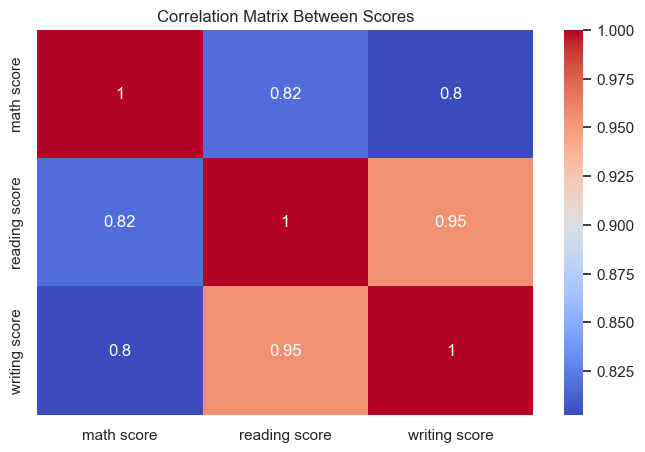

In [9]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Between Scores')
plt.show()

## ⚖️ Optional: Data Normalization

Although not strictly required for EDA, normalization is useful for understanding how values are scaled and for preparing data for future modeling. We use MinMaxScaler to scale each score between 0 and 1.


In [10]:
scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
scaled_df = pd.DataFrame(scaled_scores, columns=['math_score_scaled', 'reading_score_scaled', 'writing_score_scaled'])
scaled_df.describe()

,math_score_scaled,reading_score_scaled,writing_score_scaled
count,1000.000000,1000.000000,1000.000000
mean,0.660890,0.628542,0.645044
std,0.151631,0.175906,0.168841
min,0.000000,0.000000,0.000000
25%,0.570000,0.506024,0.530556
50%,0.660000,0.638554,0.655556
75%,0.770000,0.746988,0.766667
max,1.000000,1.000000,1.000000


## ✅ Summary and Insights

- The dataset contains well-structured student performance data with no missing values.
- Score distributions are slightly skewed and show variation by gender.
- There is a **strong correlation between reading and writing scores**.
- **Math scores** appear more independent but still related.
- Normalization helps rescale values and prepares data for modeling.

---

> Developed as part of the Codveda Data Science Internship – Level 1 Task 3
